In [1]:
##notes(about the dataset):-

                   #gold prices dependent on several other stock prices

#Date - mm/dd/yyyy
#SPX - is a free float weighte measurement stock market index of the 500 largest companies listed on stock exchanges in the united states.
#GLD - gold price
#USO - united states oil fund
#SLV - silver price
#EUR/USD - currency pair quotation of the Euro against the US

In [2]:
### import basic libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("gld_price_data.csv")                                    ### dataset loading

In [4]:
### dataset analyzing
for i in range(1,2,1):
    print("SHAPE:")    
    print(df.shape)
    print("COLUMNS:")  
    print(df.columns)
    print("HEAD:")     
    print(df.head())
    print("DESCRIBE:")            #describe --> statistical measures of the data
    print(df.describe())
    print("INFO:")
    print(df.info())

SHAPE:
(2290, 6)
COLUMNS:
Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')
HEAD:
       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
DESCRIBE:
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297


In [5]:
df.isnull().sum()                                                    ### to find null values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
#Note : the dataset does not contain null values

<AxesSubplot:>

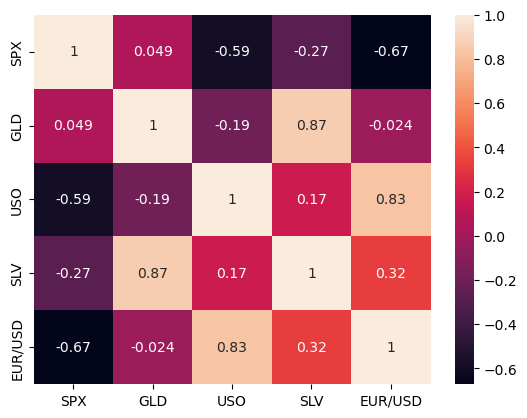

In [7]:
### dataset vizualizion          
                                                                    
sns.heatmap(df.corr(), annot=True) 

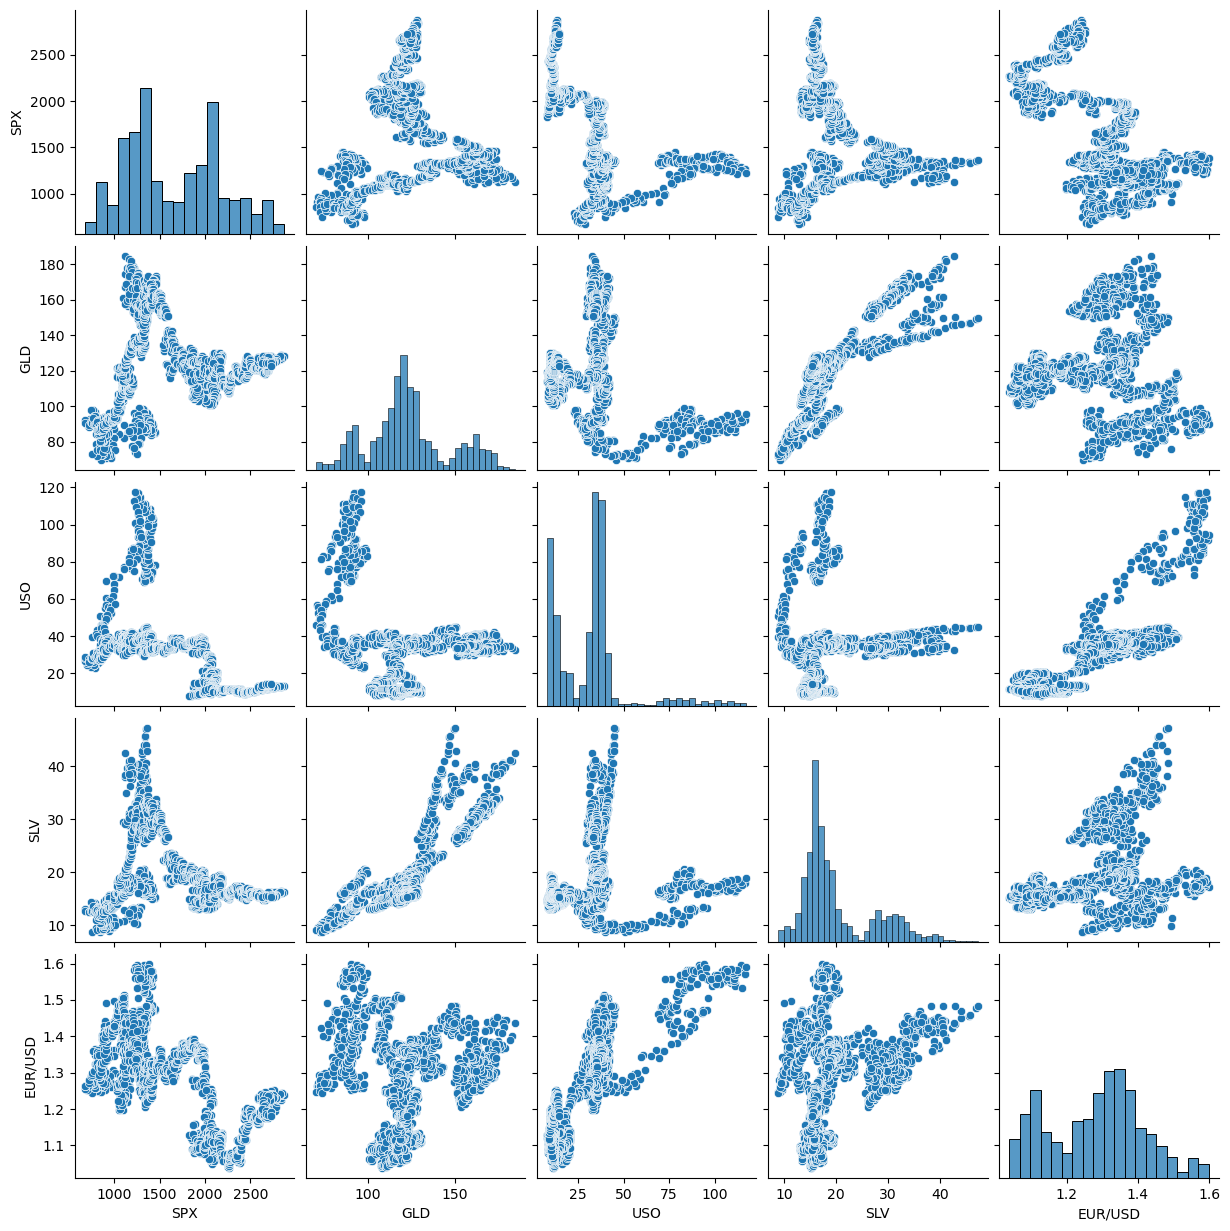

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='GLD', ylabel='Density'>

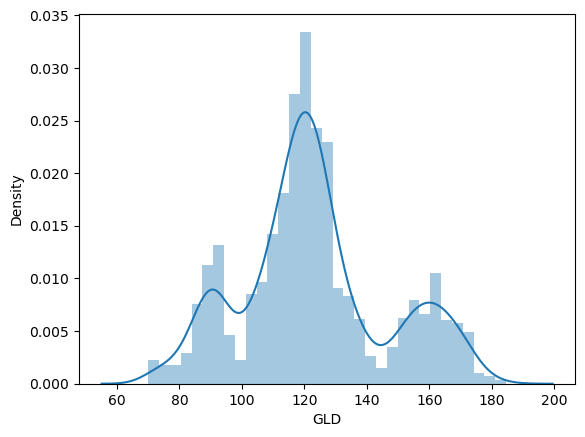

In [8]:
sns.distplot(df["GLD"]) 

array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'GLD'}>],
       [<AxesSubplot:title={'center':'USO'}>,
        <AxesSubplot:title={'center':'SLV'}>],
       [<AxesSubplot:title={'center':'EUR/USD'}>, <AxesSubplot:>]],
      dtype=object)

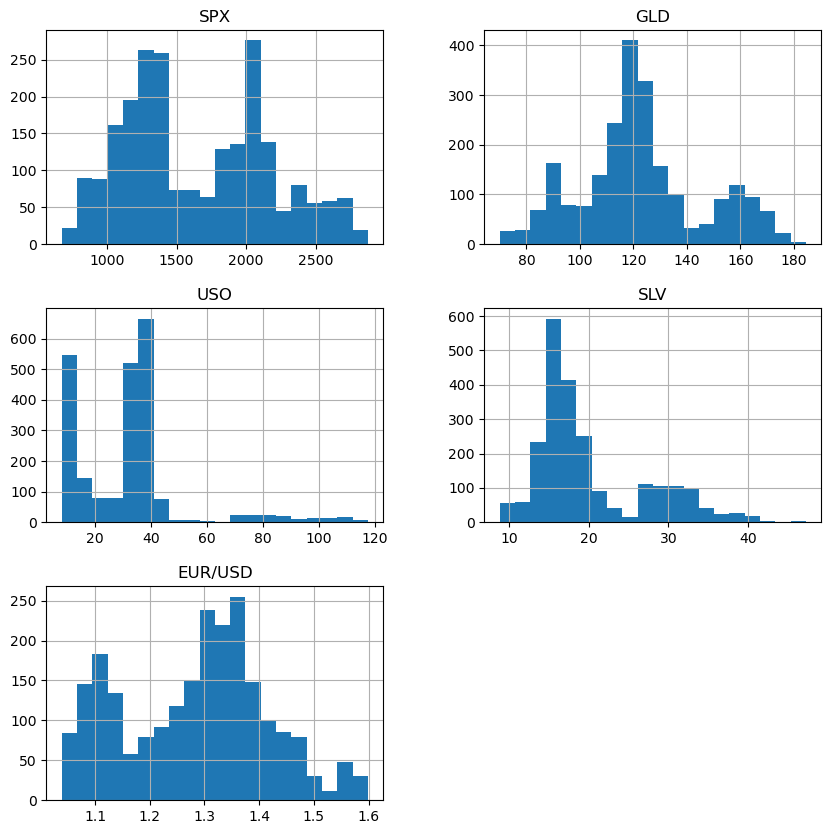

In [9]:
df.hist(bins=20, figsize=(10,10))              

Text(0, 0.5, 'GLD')

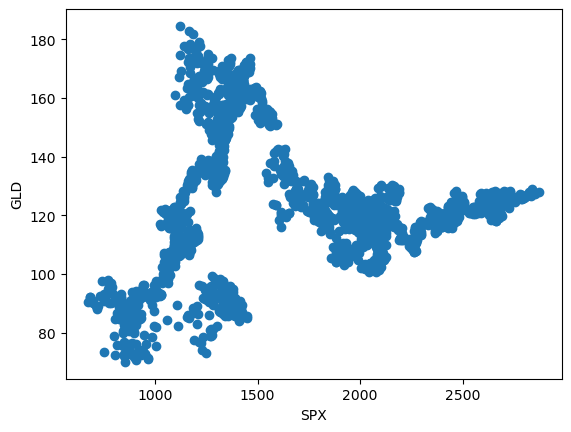

In [10]:
plt.scatter(df['SPX'],df['GLD'])
plt.xlabel('SPX')
plt.ylabel('GLD')            

<AxesSubplot:xlabel='SPX', ylabel='GLD'>

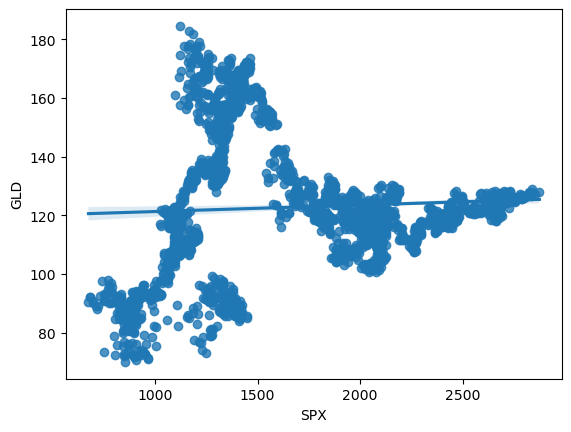

In [11]:
sns.regplot(x='SPX',y='GLD',data=df)

Text(0, 0.5, 'GLD')

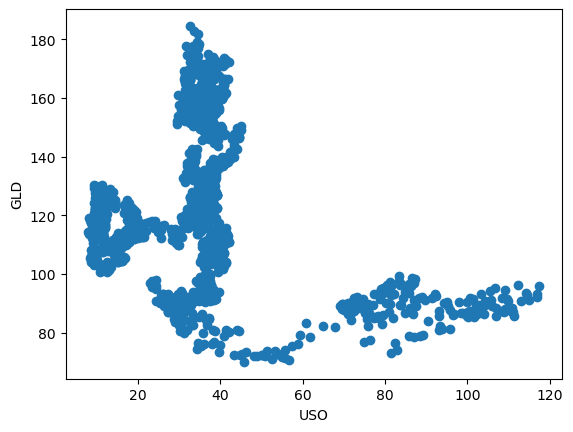

In [12]:
plt.scatter(df['USO'],df['GLD'])
plt.xlabel('USO')
plt.ylabel('GLD')                                

<AxesSubplot:xlabel='USO', ylabel='GLD'>

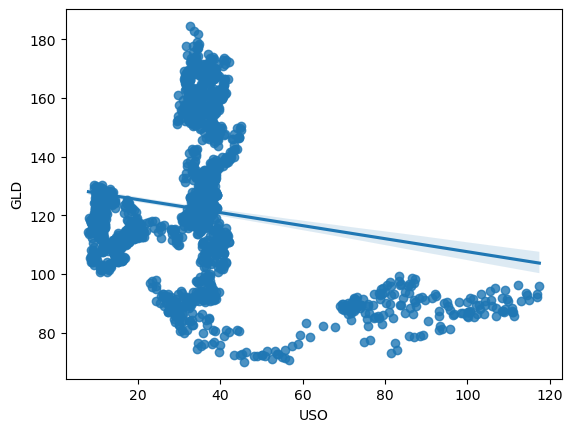

In [13]:
sns.regplot(x='USO',y='GLD',data=df)

Text(0, 0.5, 'GLD')

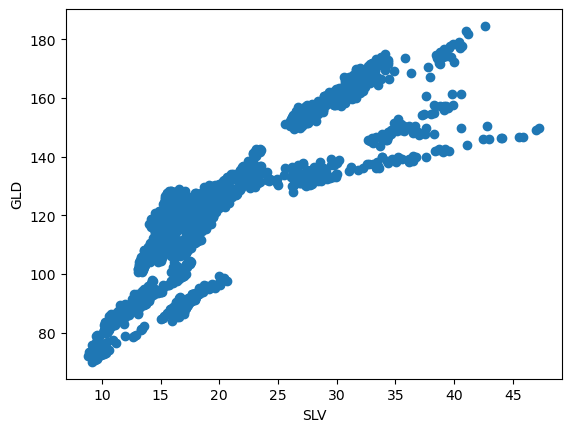

In [14]:
plt.scatter(df['SLV'],df['GLD'])
plt.xlabel('SLV')
plt.ylabel('GLD')    

<AxesSubplot:xlabel='SLV', ylabel='GLD'>

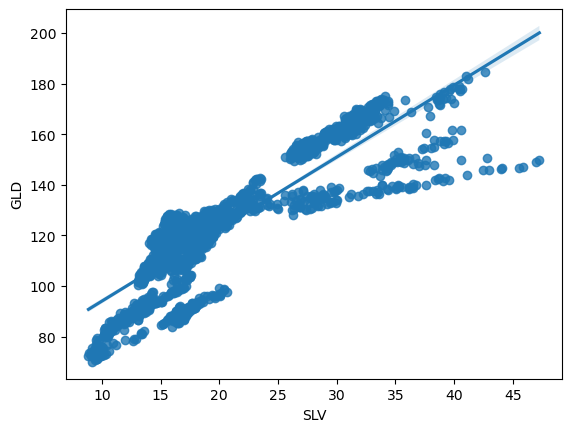

In [15]:
sns.regplot(x='SLV',y='GLD',data=df)

Text(0, 0.5, 'GLD')

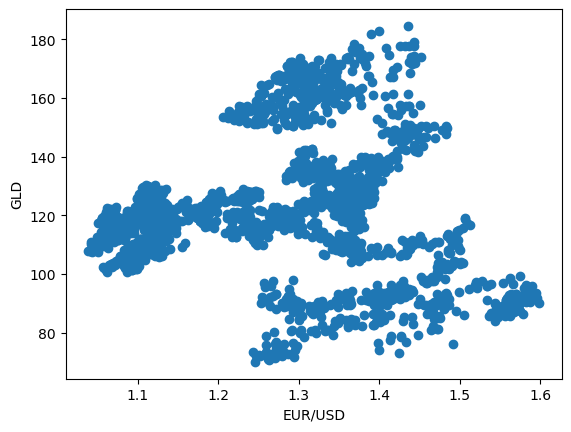

In [18]:
plt.scatter(df['EUR/USD'],df['GLD'])
plt.xlabel('EUR/USD')
plt.ylabel('GLD')           

<AxesSubplot:xlabel='EUR/USD', ylabel='GLD'>

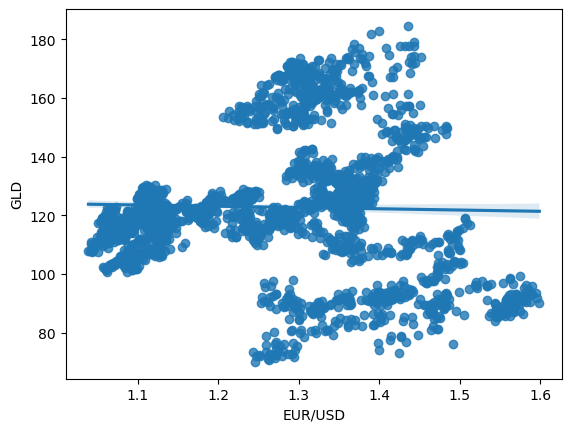

In [19]:
sns.regplot(x='EUR/USD',y='GLD',data=df)

In [20]:
### feature(x) & label(y)
y=df["GLD"]
x=df.drop(["Date","GLD"],axis=1) 

In [21]:
from sklearn.model_selection import train_test_split                     ### train_test_split    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
### score & algorithm
#score
from sklearn.metrics import r2_score
#REGRESSION ALGORITHMS
from sklearn.ensemble import RandomForestRegressor    #1          
from xgboost import XGBRegressor                      #2
from sklearn.tree import DecisionTreeRegressor        #3
from sklearn.linear_model import LinearRegression     #4

In [23]:
#1.randomforestregressor
REGR = RandomForestRegressor()                
REGR.fit(xtrain,ytrain)                                             
PRED=REGR.predict(xtest)                                    
                        
r2_score(ytest,PRED)                                           

0.9905599359560826

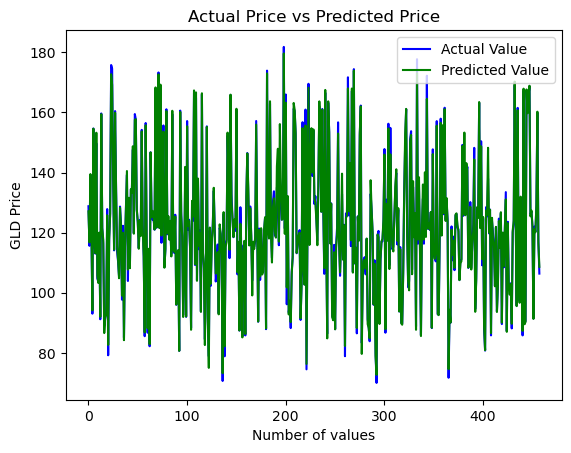

In [24]:
Y_TEST=list(ytest)                

plt.plot(Y_TEST, color='blue', label = 'Actual Value')     
plt.plot(PRED, color='green', label='Predicted Value')            

plt.title('Actual Price vs Predicted Price')         
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [25]:
#2.DecisionTreeRegressor        
DTR = DecisionTreeRegressor()
DTR.fit(xtrain,ytrain)                                             
PRED=DTR.predict(xtest)                                    

r2_score(ytest,PRED) 

0.9831211604391108

In [26]:
#3. Linear Regression
LRM = LinearRegression()                                                     
LRM.fit(xtrain, ytrain)    

LinearRegression()

In [27]:
LRM.coef_  

array([ 6.81141246e-03, -2.44980516e-01,  3.19962417e+00, -1.05039668e+01])

In [28]:
LRM.intercept_

68.56328857517371

In [29]:
LRM.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [30]:
lrmpred = LRM.predict(xtest)

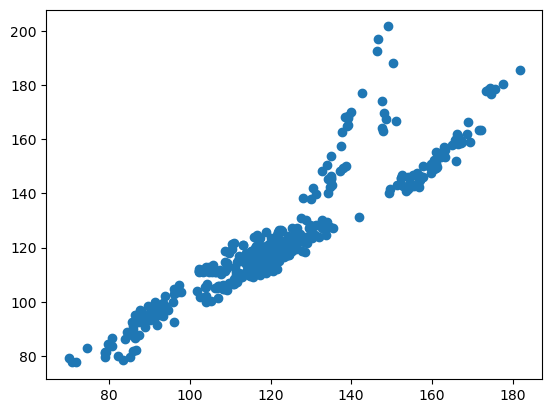

In [31]:
plt.scatter(ytest, lrmpred)

In [32]:
residuals = ytest-lrmpred

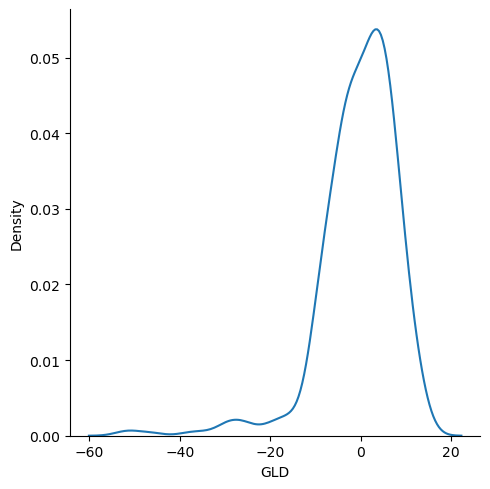

In [33]:
sns.displot(residuals, kind="kde")

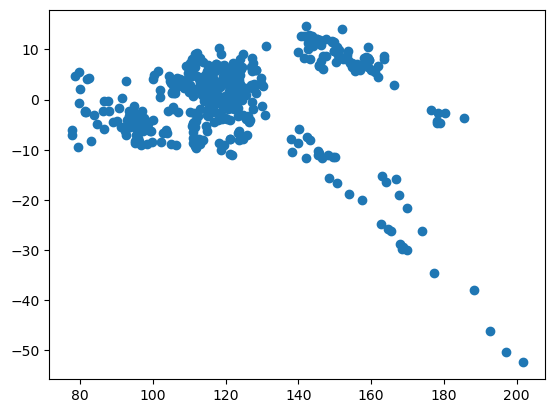

In [34]:
plt.scatter(lrmpred,residuals)

In [40]:
from sklearn.metrics import mean_squared_error          
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(ytest,lrmpred))
print(mean_squared_error(ytest,lrmpred))
print(np.sqrt(mean_squared_error(ytest,lrmpred)))

score = r2_score(ytest,PRED) 
score

6.112232362039995
75.61760337571627
8.695838279068687


0.9831211604391108

In [41]:
#display adjusted R-squared
1 - (1-score)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)

0.9829721199131868

In [45]:
###new value prediction
#Predictive System 
A = (1447.160034,78.470001,15.18,1.471692)

B = np.asarray(A)                                         # NUMPY ARRAY

C = B.reshape(1,-1)                                       # RESHAPE

prediction = REGR.predict(C)
print(prediction)                 

[84.88829967]


In [46]:
#Predictive System 
A = (1447.160034,78.370003,15.285,1.474491)

B = np.asarray(A)                                         # NUMPY ARRAY

C = B.reshape(1,-1)                                       # RESHAPE

prediction = REGR.predict(C)
print(prediction)                  

[85.14979903]
